<a href="https://colab.research.google.com/github/Niteeshvarma10/heart-disease/blob/main/pro1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [5]:
df=pd.read_csv('heart.csv')

In [6]:
df.shape

(1025, 14)

In [7]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [8]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [10]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [11]:
df.duplicated().sum()

np.int64(723)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.nunique()


,0
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [15]:
df.rename(columns={
    'age' : 'Age',
    'sex' : 'Sex',
    'cp' : 'Chest Pain',
    'trestbps':'Resting_BP',
    'chol':'Cholestrol',
    'fbs':'Fasting_Blood_Sugar',
    'restecg':'Resting ECG',
    'thalach':'Max_Heart_rate',
    'exang':'Excercies_Induced_Angina',
    'oldpeak':'Old_Peak',
    'ca':'No_Major_Vessels',
    'thal':'Thal',
    'target':'Target'},inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       302 non-null    int64  
 1   Sex                       302 non-null    int64  
 2   Chest Pain                302 non-null    int64  
 3   Resting_BP                302 non-null    int64  
 4   Cholestrol                302 non-null    int64  
 5   Fasting_Blood_Sugar       302 non-null    int64  
 6   Resting ECG               302 non-null    int64  
 7   Max_Heart_rate            302 non-null    int64  
 8   Excercies_Induced_Angina  302 non-null    int64  
 9   Old_Peak                  302 non-null    float64
 10  slope                     302 non-null    int64  
 11  No_Major_Vessels          302 non-null    int64  
 12  Thal                      302 non-null    int64  
 13  Target                    302 non-null    int64  
dtypes: float64(1), 

In [17]:
df_copy=df.copy()

In [18]:
df_copy.replace({'Sex':{0:'Female',1:'Male'}},inplace=True)

In [19]:
df_copy.replace({'Target':{0:'Clean',1:'Disease '}},inplace=True)

In [20]:
corr_matrix=df.corr()
corr_matrix

,Age,Sex,Chest Pain,Resting_BP,Cholestrol,Fasting_Blood_Sugar,Resting ECG,Max_Heart_rate,Excercies_Induced_Angina,Old_Peak,slope,No_Major_Vessels,Thal,Target
Age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
Sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
Chest Pain,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
Resting_BP,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
Cholestrol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
Fasting_Blood_Sugar,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
Resting ECG,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
Max_Heart_rate,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
Excercies_Induced_Angina,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
Old_Peak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [21]:
target_corr = corr_matrix['Target'].sort_values(ascending=False)
print("Correlation with target:\n", target_corr)

Correlation with target:
 Target                      1.000000
Chest Pain                  0.432080
Max_Heart_rate              0.419955
slope                       0.343940
Resting ECG                 0.134874
Fasting_Blood_Sugar        -0.026826
Cholestrol                 -0.081437
Resting_BP                 -0.146269
Age                        -0.221476
Sex                        -0.283609
Thal                       -0.343101
No_Major_Vessels           -0.408992
Old_Peak                   -0.429146
Excercies_Induced_Angina   -0.435601
Name: Target, dtype: float64


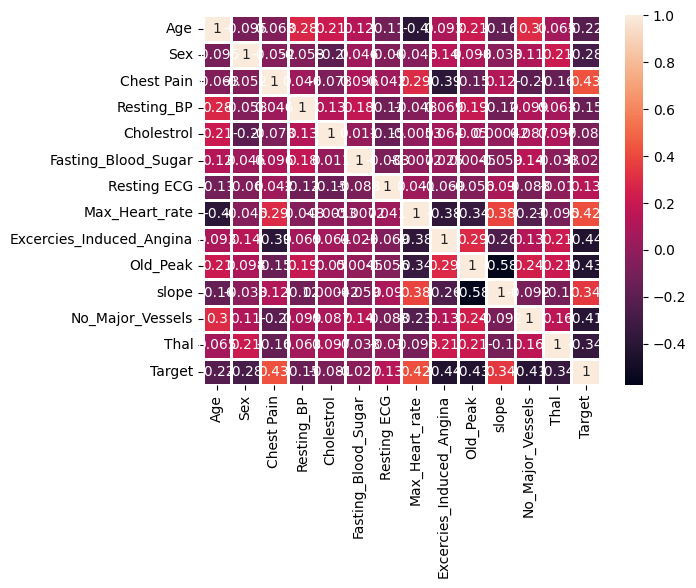

In [22]:
sns.heatmap(corr_matrix,annot=True,linewidths=2)
plt.show()

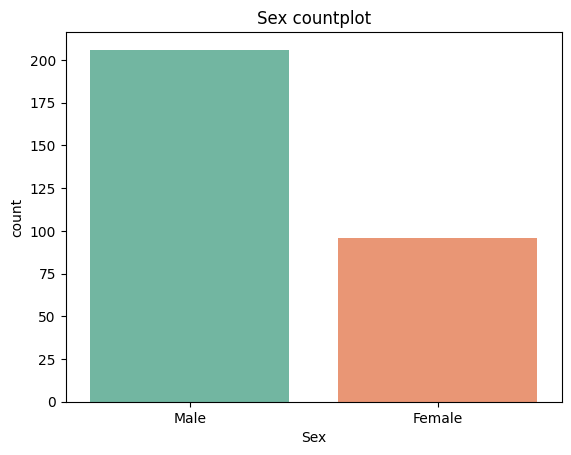

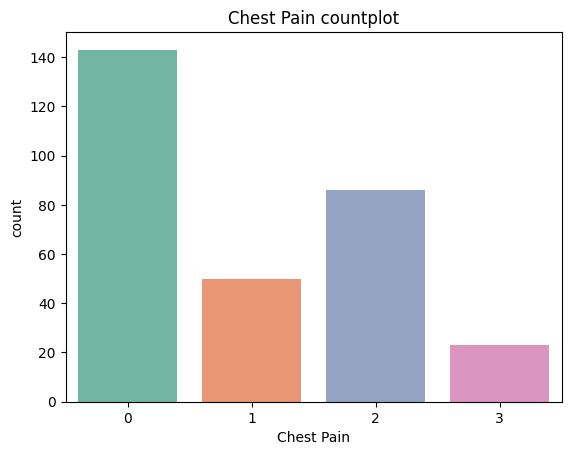

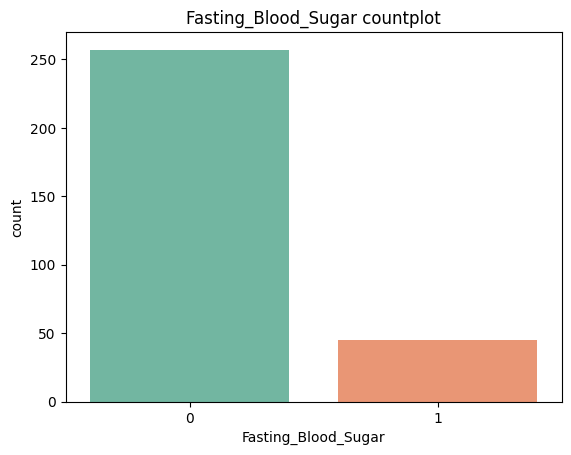

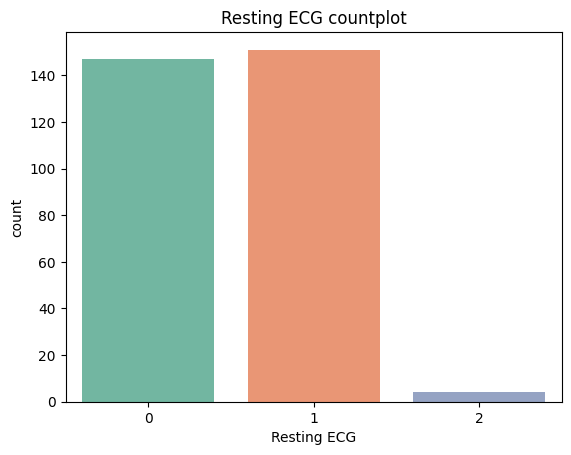

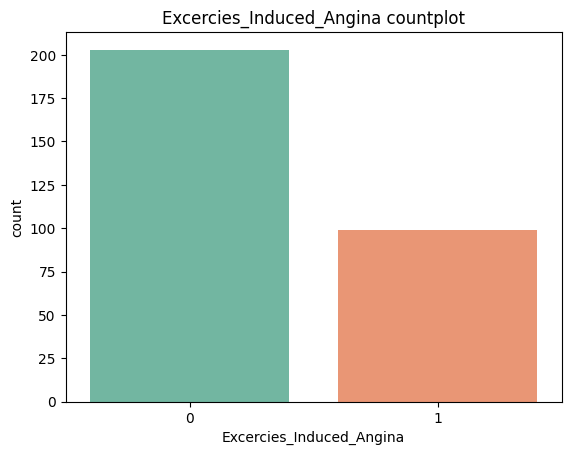

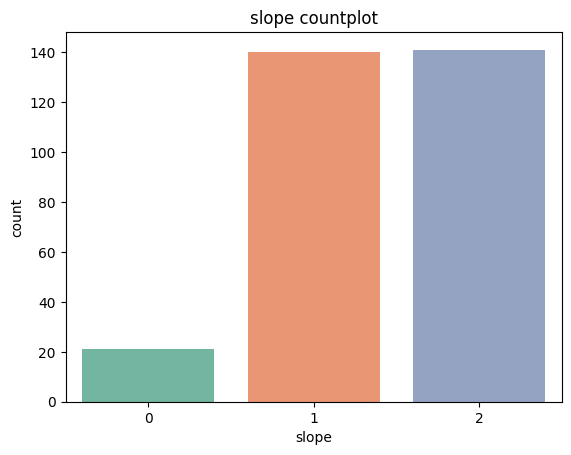

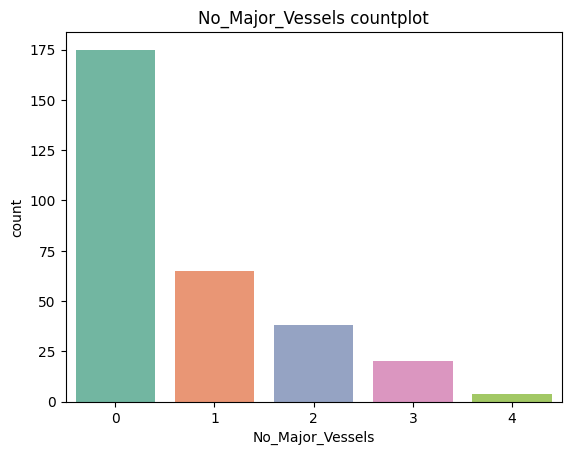

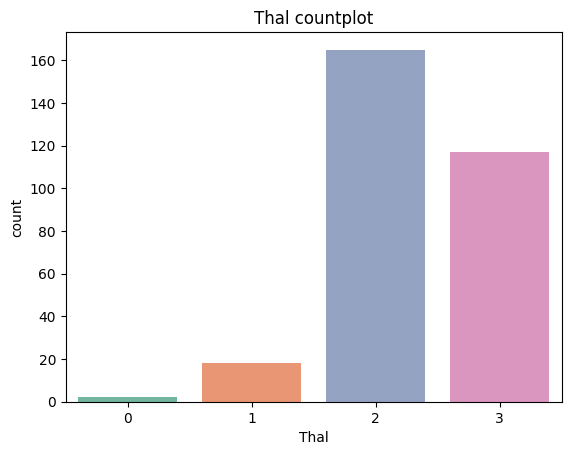

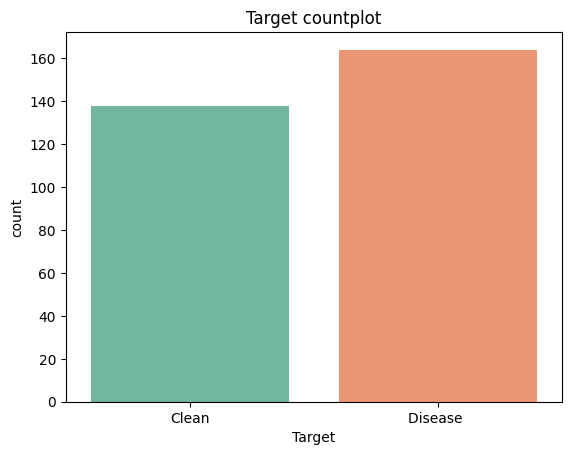

In [23]:
cols_to_plot=['Sex','Chest Pain','Fasting_Blood_Sugar','Resting ECG',
              'Excercies_Induced_Angina','slope','No_Major_Vessels','Thal','Target']
for col in cols_to_plot:
    sns.countplot(data=df_copy,x=col, palette='Set2')
    plt.title(f'{col} countplot')
    plt.show()

In [24]:
px.pie(df_copy,values='Age', names = 'Sex',title='Age Vs Sex')

In [25]:
px.pie(df_copy,values='Age', names = 'Target',title='Age Vs Target')

In [26]:
fig=px.box(df, y='Resting_BP', title='Resting_BP Box Plot ',orientation='v')
fig.update_traces(marker_color='green', boxmean='sd')

In [27]:
fig2=px.box(df, y='Cholestrol', title='Cholestrol Box Plot ',orientation='v')
fig2.update_traces(marker_color='blue', boxmean='sd')

In [28]:
fig3=px.box(df, y='Max_Heart_rate', title='Max_Heart_rate Box Plot ',orientation='v')
fig3.update_traces(marker_color='black', boxmean='sd')

In [29]:
fig5=px.box(df, y='No_Major_Vessels', title='No_Major_Vessels Box Plot ',orientation='v')
fig5.update_traces(marker_color='gray', boxmean='sd')

In [30]:
hist_fig= px.histogram(df_copy, x='Age', title='Agewise Distribution')
hist_fig.update_traces(marker_color='green', opacity=0.7)

In [31]:
hist_fig2= px.histogram(df_copy, x='Resting_BP', title='Resting_BP Distribution')
hist_fig2.update_traces(marker_color='blue', opacity=0.7)

In [32]:
hist_fig3= px.histogram(df_copy, x='Cholestrol', title='Cholestrol Distribution')
hist_fig3.update_traces(marker_color='black', opacity=0.7)

In [33]:
hist_fig4= px.histogram(df_copy, x='Max_Heart_rate', title='Max_Heart_rate Distribution')
hist_fig4.update_traces(marker_color='purple', opacity=0.7)

In [34]:
y=df[['Target']]
x=df.drop('Target',axis=1)

In [35]:
x

,Age,Sex,Chest Pain,Resting_BP,Cholestrol,Fasting_Blood_Sugar,Resting ECG,Max_Heart_rate,Excercies_Induced_Angina,Old_Peak,slope,No_Major_Vessels,Thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [36]:
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
723,1
733,1
739,0
843,0


In [37]:
cols_to_drop=['Fasting_Blood_Sugar','Cholestrol','Resting_BP','Resting ECG','Age']
df.drop(cols_to_drop,axis=1,inplace=True)

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=272)

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 13)
(61, 13)
(241, 1)
(61, 1)


In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

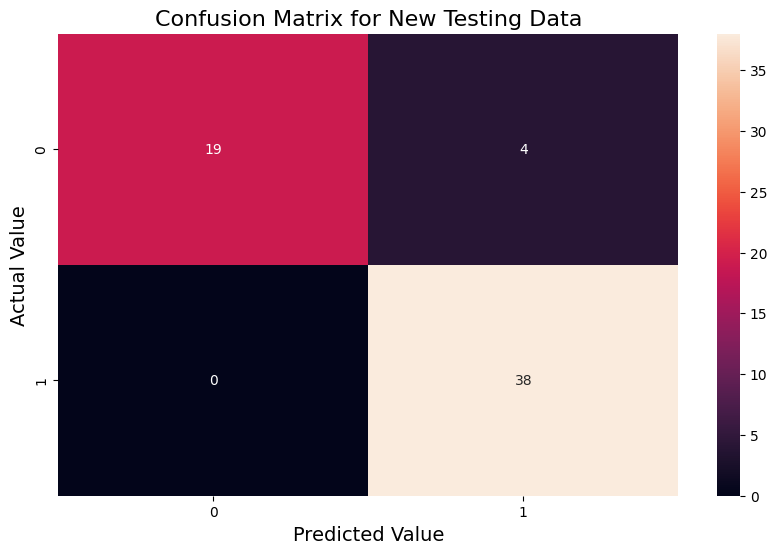

In [41]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
plt.title('Confusion Matrix for New Testing Data', fontsize=16)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)
plt.show()

In [42]:
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90        23
           1       0.90      1.00      0.95        38

    accuracy                           0.93        61
   macro avg       0.95      0.91      0.93        61
weighted avg       0.94      0.93      0.93        61

